# Τεχνικές Εξόρυξης Δεδομένων - Εργαστηριακή Άσκηση 1
---

Στόχος της εργαστηριακής άσκησης αυτής είναι η εξοικείωση σας με βασικές διαδικασίες στην εξόρυξη δεδομένων χρησιμοποιώντας την βιβλιοθήκη [**pandas**](https://pandas.pydata.org/pandas-docs/stable/). Στην άσκηση αυτή, αφότου δημιουργήσετε ένα ενδεικτικό _dataset_ (το σύνολο των δεδομένων που θα μας απασχολήσει), θα σιγουρευτούμε για την ακεραιότητα του (αν ειναι _"clean"_) και θα παρουσιάσετε ορισμένα βασικά συμπεράσματα από την μελέτη του, χρησιμοποιώντας επιπλέον την βιβλιοθήκη [**matplotlib**](https://matplotlib.org/3.1.1/users/index.html) για την γραφική παράσταση αυτών.

**Σημείωση/Υπόμνημα:** Πολλές εντολές σημείωνοται `έτσι`. Οι εντολές που είναι [`σε αυτήν την μορφή`]() περιέχουν συνδέσμους προς το documentation της συνάρτησης/μεθόδου στην οποία αναφέρονται.  Μην ξεχάσετε να τις επισκεφτείτε αν <<κολλήσετε>> σε οποιδήποτε σημείο.

In [2]:
# Χρησιμοποιώντας την εντολή import, εισάγετε τις προαναφερθείσες βιβλιοθήκες καθώς και την sys
# Αν δεν είναι εγκατεστημένες μπορείτε να χρησιμοποιήσετε την εντολή: !pip install pandas matplotlib
# Θα χρειαστούμε μόνο το pyplot module της matplotlib.
# Μην ξεχάσετε να ορίσετε local names (pd για το pandas και plt για το matplotlib.pyplot)

import pandas as pd
import matplotlib.pyplot as plt
import sys

# Θα χρησιμοποειθεί μόνο για την εύρεση της έκδοσης του matplotlib
import matplotlib 
# Χρησιμοπoείται για inline plotting
%matplotlib inline 

In [ ]:
# Επιβεβαιώστε ότι έχει γίνει σωστά η εισαγωγή τρέχοντας το τρέχον κελί.
# Η έξοδος του κελιού πρέπει να είναι της μορφής:
# Python version 3.X.X (default, MM DD YYYY, HH:MM:SS)
# Matplotlib version 3.X.X
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
Pandas version 1.2.2
Matplotlib version 3.3.4


---
## 1. Δημιουργία Dataset
Τα δεδομένα που θα χρησιμοποιήσετε αποτελούνται από 5 ονόματα καθώς και το πλήθος παιδιών που "πήραν" το όνομα αυτό σε έναν χρόνο.

In [4]:
# Τα δεδομένα σε παράλληλες λίστες
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [6]:
# Χρησιμοποιώντας την εντολή zip δημιουργήστε μια λίστα από tuples με την εξής μορφή:
# [('Bob', 968), ('Jessica', 155), ...
# Μπορείτε να χρησιμοποιήσετε την εντολή zip? για περισσότερες πληροφορίες

dataset = list(zip(names,births))

Η χρήση της **pandas** βασίζεται στα αντικείμενα τύπου **dataframe**. Θα πρέπει να ενσωματώσουμε τα δεδομένα μας σε ένα dataframe πρωτού χρησιμοποιήσομε τις λειτουργίες της βιβλιοθήκης.

In [ ]:
# Χρησιμοποιώντας την pandas.DataFrame(...) ενσωματώστε σε ένα dataframe το dataset που κατασκευάσατε.
# και κατόπιν εκτυπώστε το.
# Υπόδειξη: Θα πρέπει να ορίσετε τα ορίσματα data και columns κατάλληλα.

df = pd.DataFrame(data = dataset, columns=['Names', 'Births'])


Πλέον τα δεδομένα είναι σε μορφή dataframe! Αυτό σημαίνει ότι μπορούμε να χρησιμοποιήσουμε όλες τις δυνατότητες της βιβλιοθήκης pandas. Για παράδειγμα, μπορούμε να εξάγουμε το dataframe σε **csv** (comma seperated values) χρησιμοποιώντας την `pandas.to_csv`.

In [ ]:
# Εξάγετε το dataset στο 'births1880.csv' χωρίς Header και index.
# Μπορείτε να χρησιμοποιήσετε την εντολή pandas.to_csv? για περισσότερες πληροφορίες

df.to_csv('/content/gdrive/MyDrive/DICources/births1880.csv',index=False,header=False)


---
## 2."Διάβασμα" Dataset
Μέσω της **pandas** μπορούμε εξίσου εύκολα να διαβάσουμε ένα αρχείο csv μέσω της συνάρτησης [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). H συνάρτηση αυτή δέχεται πολλά ορίσματα, ωστόσο εμείς θα δώσουμε μόνο την θέση του αρχείου που θέλουμε να διαβάστεί. Σε κάθε περίπτωση, το αποτέλεσμα θα είναι ένα dataframe.

In [ ]:
# Δημιουργήστε ένα καινούριο dataframe διαβάζοντας το csv που δημιουργήθηκε πιο πριν.

Location = r'' # Τo r κάνει escape όλους τους χαρακτήρες στην συμβολοσειρά

df = pd.read_csv(Location)

# και τυπώστε το

df


Σε αυτό το σημείο θα παρατηρήσετε ότι το αποτέλεσμα είναι προβληματικό. Η [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) θεωρεί ότι η πρώτη γραμμή του αρχείου περιέχει τα ονόματα των στηλών, πράγμα το οποίο προφανώς δεν ισχύει για την περίπτωση μας. Αυτό μπορεί εύκολα να διορθωθεί τροποποιώντας το όρισμα **header** της συνάρτησης.

In [ ]:
# Διαβάστε σωστά πλέον το αρχείο και τυπώστε το

df = pd.reac_csv("",header=None)

df


In [ ]:
# Δώστε άρτια ονόματα στις στήλες (έστω Names και Births) χρησιμοποιώντας το όρισμα names 
# της read_csv και τυπώστε το dataframe.
# Υπόδειξη: Μπορείτε να δώσετε λίστα με περισσότερα ονόματα σαν όρισμα

df = pd.read_csv(Location, names=['Names','Births'])

df


Τα [0,1,2,3,4] στην πρώτη στήλη συμβολίζουν τον αριθμό γραμμής όπως σε ένα τυπικό spreadsheet. Στην pandas τα indexes αυτά είναι μέρη του dataframe και έχουν τον ίδιο ρόλο με τα πρωτεύοντα κλειδιά σε μια βάση δεδομένων sql. Ωστόσο, επιτρέπεται περισσότερες από μία γραμμές να έχουν το ίδιο index.

Οι υπόλοιπες στήλες αντιπροσωπεύουν τα χαρακτηριστικά.

In [ ]:
# Διγράψτε το csv αρχείο μιας που δεν χρειάζεται πλέον.
# Υπόδειξη: Εισάγετε την βιβλιοθήκη os και χρησιμοποιήστε την os.remove(...)

import os
os.remove(Location)


---
## 3. Προετοιμασία Dataset
Το dataset που διαθέτουμε έχει 5 εγγραφές συνολικά και γνωρίζουμε εκ των προτέρων ότι δεν είναι ελλειπή και έχουν τιμές σε όλα τα πεδία (περιέχουν μόνο **non-null** values).
Δεν θα λάβουμε υπόψην το πεδίο **Names** προς το παρών. Υπάρχει περίπτωση να υπάρχει κάποια λανθασμένη τιμή, αλλά αυτό είναι ένα πρόβλημα που θα μας απασχολήσει στο μέλλον. Το πεδίο **Births** από την άλλη περιέχει αριθμούς και συγκεκριμένα ακεραίους, αφού αντιπροσωπεύει πλήθος παιδιών. Δεν θα είχε νόημα να περιέχει το συγκεκριμένο πεδίο αριθμούς κινητής υποδιαστής (float).

O έλεγχος των δεδομένων αποτελεί σημαντικό μέρος του κύκλου Ανάλυσης Δεδομένων. Προς το παρών, ας ρίξουμε μια ματιά στους τύπους των δεδομένων στο dataset που κατασκευάσατε:

In [ ]:
# Ελέγξτε τους τύπους των χαρακτηριστικών του dataframe που κατασκευάσατε, χρησιμοποιώντας το πεδίο 
# dtypes του dataframe

df.dtypes


Names     object
Births     int64
dtype: object

In [ ]:
# Ελέγξτε το είδος των δεδομένων στην στήλη Births, χρησιμοποιώντας το πεδίο dtype του dataframe.Births
# Θα πρέπει να σιγουρευτείτε ότι περιέχει μόνο ακεραίους

df.Births.dtype


dtype('int64')

---
## 4. Ανάλυση Δεδομένων
Έστω ότι θέλουμε να βρούμε το όνομα, το οποίο δόθηκε στο μεγαλύτερο αριθμό παιδιών. Μπορούμε να "κινηθούμε" με δύο τρόπους:
* Ταξινομώντας το dataframe και επιλέγοντας την πρώτη γραμμή
* Χρησιμοποιώντας την `max()` στο πεδίο Births

In [ ]:
# Μέθοδος 1:

Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)


,Names,Births
4,Mel,973


In [ ]:
# Μέθοδος 2:

df['Births'].max()


973

---
## 5. Παρουσίαση Δεδομένων
Στην τελευταία φάση της εργασίας θα χρησιμοποιήσουμε την matplotlib για να παρουσιάσουμε σε μορφή γραφικής παράστασης το dataset καθώς και το μέγιστο που βρέθηκε πριν. Με την γραφική παράσταση και έναν απλό πίνακα τιμών, ο αναγνώστης θα έχει πλήρη γνώση ότι το πιο σύνηθες όνομα στα δεδομένα ειναι το **Mel**.


H μέθοδος [`plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) του pandas μπορεί πολύ εύκολα να δημιουργήσει την γραφική παράσταση των δεδομένων. Στην προυγούμενη ενότητα υλοποιήθηκαν δύο τρόποι εύρεσης του μεγίστου, ωστόσο η εύρεση του ονόματος που έχει το μέγιστο είναι λίγο πιο πολύπλοκη υπόθεση.

Υποδείξεις:

* `df['Names']`: Η λίστα με όλα τα ονόματα
* `df['Births']`: Η λίστα με το πλήθος εμφάνισης των ονομάτων
* `df['Birts'].max()` : Η μέγιστη τιμή της στήλης Births
* `[df['Births'] == df['Births'].max()]` : Όλες οι εγγραφές που έχουν πλήθος εμφάνισης όσο το μέγιστο
* `df['Names'][df['Births'] == df['Births'].max()]` : Όλες τα ονόματα των εγγραφών που έχουν πλήθος εμφάνισης όσο το μέγιστο

* Εναλλατικά, θα μπορούσε να γίνει χρήση της: `Sorted['Names'].head(1).value # Sorted : Ταξινομημένο dataframe`
* Η `str()` μπορεί να χρησιμοιποιηθεί για την μετατροπή ενός αντικειμένου σε συμβολοσειρά.


The most popular name


,Names,Births
4,Mel,973


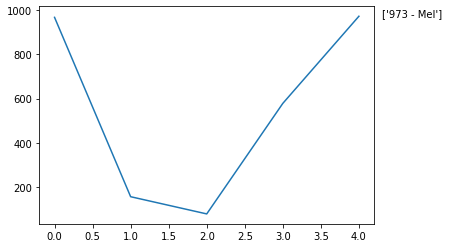

In [ ]:
# Δημιουργία γραφικής παράστασης του χαρακτηριστικού Births

df['Births'].plot()

# Εύρεση μέγιστης τιμής

MaxValue = df['Births'].max()

# Εύρεση ονόματος μέγιστης τιμής

MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Προσθήκη επεξηγηματικού κειμένου στο γράφημα (χρήση plt.annotate)
# Μορφή: [BIRTHS - NAME]

Text = str(MaxValue) + " - " + MaxName

plt.annotate(Text, # Συμβολοσειρά που θα τυπωθεί
             xy=(1, MaxValue), # Θέση που θα περιγραφεί η σημείωση
             xytext=(8, 0), # Θέση που θα τυπωθεί το κείμενο
             xycoords=('axes fraction', 'data'), # Σύστημα αξόνων δεδομένων
             textcoords='offset points') # Σύστημα αξόνων σημείωσης
             
# Εκτύπωση μέγιστης τιμής από dataframe

print("The most popular name:")
df[df['Births'] == df['Births'].max()]


> Χατζής Χρήστος - cs120004@di.uoa.gr - v1.0